# Task 1
### 1.1 Preprocessing data
in this section we are importing data and joining the tables accoirding to thier primary key.


In [70]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
import sklearn.preprocessing as preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import SMOTE


In [2]:
path = '/content/gdrive/MyDrive/AML/'
iden_path = path + 'data_identity.csv'
tran_path = path + 'data_transaction.csv'
identity  = pd.read_csv(iden_path)
transaction = pd.read_csv(tran_path)

In [3]:
joined_table = pd.merge(identity,transaction, on = 'TransactionID')
joined_table.shape

(144233, 434)

In [4]:
transaction = None
identity = None

Next we remove non-numeric features since.

In [5]:
joined_table = joined_table.drop([col for col in joined_table if joined_table[col].dtype  == 'object'], axis = 1)
joined_table.shape

(144233, 403)

In [6]:
y = joined_table.isFraud

Change every column data type to 'float64'

In [7]:
joined_table = joined_table.astype('float64')


Checking for empty columns so we can remove them: 

In [8]:
k = 1
empty_columns = []
for elem in joined_table.columns:
    if joined_table[elem].isnull().values.all():
        print(elem, k)
        empty_columns.append(elem)
        k += 1

joined_table = joined_table.drop(empty_columns, axis = 1)
joined_table.shape

dist1 1
D11 2
V1 3
V2 4
V3 5
V4 6
V5 7
V6 8
V7 9
V8 10
V9 11
V10 12
V11 13


(144233, 390)

In [9]:
any(joined_table.TransactionDT.isna())

False

In [10]:
X = joined_table.fillna(0.0)
X = X.reset_index().drop(['index'] , axis = 1)

Calculating indicator matrix:

In [11]:
indicator = []
for ind in range(joined_table.shape[0]):
    indicator.append([int(not elem) for elem in joined_table.iloc[ind].isna()])
indicator = np.array(indicator)
indicator.shape

(144233, 390)

In [12]:
indicator = pd.DataFrame(indicator, columns = joined_table.columns, dtype = 'float64')
indicator

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144229,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
144230,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144231,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [13]:
joined_table.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987004.0,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987008.0,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987010.0,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987011.0,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987016.0,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
imputer = SimpleImputer(strategy='mean')
imputer.fit_transform(joined_table).shape
mask = pd.DataFrame(imputer.fit_transform(joined_table), columns=joined_table.columns)
mask


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987004.0,0.0,70787.0,0.060189,-0.058938,1.615585,-6.69871,13.285354,-38.600388,0.091023,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2987008.0,-5.0,98945.0,0.060189,-0.058938,0.000000,-5.00000,13.285354,-38.600388,0.091023,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2987010.0,-5.0,191631.0,0.000000,0.000000,0.000000,0.00000,13.285354,-38.600388,0.000000,...,0.777733,723.339755,1379.108414,1017.190218,9.837929,59.213495,28.592672,55.461163,151.546395,100.950114
3,2987011.0,-5.0,221832.0,0.060189,-0.058938,0.000000,-6.00000,13.285354,-38.600388,0.091023,...,0.777733,723.339755,1379.108414,1017.190218,9.837929,59.213495,28.592672,55.461163,151.546395,100.950114
4,2987016.0,0.0,7460.0,0.000000,0.000000,1.000000,0.00000,13.285354,-38.600388,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521.0,-15.0,145955.0,0.000000,0.000000,0.000000,0.00000,13.285354,-38.600388,0.000000,...,0.777733,723.339755,1379.108414,1017.190218,9.837929,59.213495,28.592672,55.461163,151.546395,100.950114
144229,3577526.0,-5.0,172059.0,0.060189,-0.058938,1.000000,-5.00000,13.285354,-38.600388,0.091023,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
144230,3577529.0,-20.0,632381.0,0.060189,-0.058938,-1.000000,-36.00000,13.285354,-38.600388,0.091023,...,0.777733,723.339755,1379.108414,1017.190218,9.837929,59.213495,28.592672,55.461163,151.546395,100.950114
144231,3577531.0,-5.0,55528.0,0.000000,0.000000,0.000000,-7.00000,13.285354,-38.600388,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
scaler = preprocessing.MinMaxScaler()
mask = scaler.fit_transform(mask)

In [16]:
AE_input = np.array([(m,i) for m, i in zip(np.array(mask), np.array(indicator))])


In [17]:
AE_input.shape

(144233, 2, 390)

### 1.2 Autoencoders
in this section we are defining different autoencoder models.
#### 1.2.1 Undercomplete Autoencoder


In [18]:
!pip install torchsummary

In [19]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

device = 'cpu'
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device

In [21]:
## Undercomplete
class autoencoder(nn.Module):
    def __init__(self, input_size, latent_dim):
      super(autoencoder, self).__init__()
      # Step 1 : Define the encoder 
      # Step 2 : Define the decoder
      # Step 3 : Initialize the weights (optional)
      self.encoder = nn.Sequential(
          nn.Linear(input_size, input_size//2),
          nn.ReLU(True),
          nn.Linear(input_size//2, input_size//3),
          nn.Linear(input_size//3, input_size//4),
          nn.Tanh(),
          nn.Linear(input_size//4, latent_dim)
      )
      self.decoder = nn.Sequential(
          nn.Linear(latent_dim, input_size//4),
          nn.ReLU(True),
          nn.Linear(input_size//4, input_size//3),
          nn.Linear(input_size//3, input_size//2),
          nn.Tanh(),
          nn.Linear(input_size//2, input_size)
      )
      self.encoder.apply(self.__init_weights)
      self.decoder.apply(self.__init_weights)
        
    def forward(self, x):
      # Step 1: Pass the input through encoder to get latent representation
      # Step 2: Take latent representation and pass through decoder
      x = self.encoder(x)
      x = self.decoder(x)
      return x
        
        
    
    def encode(self,input):
      #Step 1: Pass the input through the encoder to get latent representation
      return self.encoder(input)
    
    def __init_weights(self,m):
      #Init the weights (optional)
      if type(m) == nn.Linear:
          torch.nn.init.xavier_uniform_(m.weight)
          m.bias.data.fill_(0.01)

In [22]:
#Create a random dataset
data_loader = DataLoader(AE_input,batch_size=32,shuffle=True)

In [23]:
batchSize = 100
learning_rate = 0.05
num_epochs = 20
sample = torch.randn((batchSize,1,64))
AE = autoencoder(AE_input.shape[-1],20).to(device)
print(AE)
# print(summary(AE,input_size=(1, 64)))

criterion = nn.L1Loss()
optimizer = torch.optim.Adam(AE.parameters(),lr=learning_rate)



autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=390, out_features=195, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=195, out_features=130, bias=True)
    (3): Linear(in_features=130, out_features=97, bias=True)
    (4): Tanh()
    (5): Linear(in_features=97, out_features=20, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=20, out_features=97, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=97, out_features=130, bias=True)
    (3): Linear(in_features=130, out_features=195, bias=True)
    (4): Tanh()
    (5): Linear(in_features=195, out_features=390, bias=True)
  )
)


### 1.2 Undercomplete Autoencode

In [24]:
learning_rate = 0.002 
num_epochs = 10
criterion = nn.L1Loss(reduction='sum').to(device)
optimizer = torch.optim.Adam(AE.parameters(),lr=learning_rate)
data_loader = DataLoader(AE_input, batch_size=64,shuffle=True)
 
X_reconstuct = [] 
Original_X = [] 
I_X = [] 
for epoch in range(num_epochs): 
  epoch_loss = list() 
  for X_batch in data_loader: 
#     print(X_batch.shape) 
    X, indic = X_batch[:, 0, :].to(device), X_batch[:, 1, :].to(device) 
#     print(X.shape) 
    optimizer.zero_grad() 
    
    X_hat = AE(X.float()) 
    loss = criterion(indic * X, indic* X_hat) 
 
    loss.backward() 
    optimizer.step() 
 
    epoch_loss.append(loss.item()) 
     
  # with torch.no_grad(): 
  #   X_reconstuct.append(AE(X.float())) 
  #   Original_X.append(X) 
  #   I_X.append(1 - indic) 
     
  print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, num_epochs, np.mean(epoch_loss)))

PATH = 'Undercomplete.pth'
torch.save(AE, PATH)

epoch [1/10], loss:260.4081
epoch [2/10], loss:159.3112
epoch [3/10], loss:139.7841
epoch [4/10], loss:131.8351
epoch [5/10], loss:126.6451
epoch [6/10], loss:122.5385
epoch [7/10], loss:119.6417
epoch [8/10], loss:116.9469
epoch [9/10], loss:115.2611
epoch [10/10], loss:113.8757


Reconstructing data:

In [25]:
data_loader = DataLoader(AE_input, batch_size=64,shuffle=False) 
X_reconstruct = []
for X_batch in data_loader:
  for X in X_batch[:, 0, :]:
    with torch.no_grad():
        AE.eval()
        X_reconstruct.append(AE(X.float()).numpy())
  
np.array(X_reconstruct).shape
    



(144233, 390)

In [26]:
X_reconst = pd.DataFrame(X_reconstruct)
y.shape

(144233,)

Here we are defing a function to split the data since we are going to try with different statistical methods.

In [27]:
def split(data, label):
  X_train, X_test, y_train, y_test = train_test_split(
  data, label, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test


Splitting **the reconstructed** data from **Undercomplete** AE:

In [28]:
X_train, X_test, y_train, y_test = split(X_reconst, y)

In [29]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     26587
           1       0.76      0.26      0.39      2260

    accuracy                           0.94     28847
   macro avg       0.85      0.63      0.68     28847
weighted avg       0.93      0.94      0.92     28847



### 1.3 Regularized Autoencoder

#### **Note**: since the architecture is the same as Undercomplete AE, so in next cell we are just calling it.

In [30]:
AE = autoencoder(AE_input.shape[-1],20).to(device)

In [31]:
def sparse_loss(autoencoder, data):
    loss = 0
    values = data
    for i in range(len(list(AE.children()))):
        values = F.relu((list(AE.children())[i](values)))
        loss += torch.mean(torch.abs(values))
    return loss

In [32]:
learning_rate = 0.002 
num_epochs = 10
criterion = nn.L1Loss(reduction='sum') 
optimizer = torch.optim.Adam(AE.parameters(),lr=learning_rate) 
data_loader = DataLoader(AE_input, batch_size=64,shuffle=True) 
 
X_reconstuct = [] 
Original_X = [] 
I_X = [] 
reg_param = 1.0

for epoch in range(num_epochs): 
  epoch_loss = list() 
  for X_batch in data_loader: 
    X, indic = X_batch[:, 0, :].to(device), X_batch[:, 1, :].to(device) 
    optimizer.zero_grad() 
     
    X_hat = AE(X.float()) 
    loss = criterion(indic * X, indic* X_hat) 
    l1_loss = sparse_loss(AE, X.float())
    loss = loss + reg_param * l1_loss

    loss.backward() 
    optimizer.step() 
 
    epoch_loss.append(loss.item()) 
     
  with torch.no_grad(): 
    X_reconstuct.append(AE(X.float())) 
    Original_X.append(X) 
    I_X.append(1 - indic) 
     
  print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, num_epochs, np.mean(epoch_loss)))


PATH = 'Regularized.pth'
torch.save(AE, PATH)

epoch [1/10], loss:280.2812
epoch [2/10], loss:169.2818
epoch [3/10], loss:143.3189
epoch [4/10], loss:136.0090
epoch [5/10], loss:131.3309
epoch [6/10], loss:127.6885
epoch [7/10], loss:125.3511
epoch [8/10], loss:123.2099
epoch [9/10], loss:118.7968
epoch [10/10], loss:116.1704


Reconstructing data:

In [33]:
data_loader = DataLoader(AE_input, batch_size=64,shuffle=False) 
X_reconstruct = []
for X_batch in data_loader:
  for X in X_batch[:, 0, :]:
    with torch.no_grad():
        AE.eval()
        X_reconstruct.append(AE(X.float()).numpy())
  
X_reconst = pd.DataFrame(X_reconstruct)



split Reconstructed data

In [34]:
X_train, X_test, y_train, y_test = split(X_reconst, y)

Classificatying reconstructed data from **Regularized** model:

In [35]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26587
           1       1.00      0.96      0.98      2260

    accuracy                           1.00     28847
   macro avg       1.00      0.98      0.99     28847
weighted avg       1.00      1.00      1.00     28847



### 1.4 VAE Autoencoder

Defining the model

In [36]:
# VAE model
class VAE(nn.Module):
    def __init__(self, image_size=390, h_dim=120, z_dim=50):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(image_size, h_dim)
        self.fc2 = nn.Linear(h_dim, z_dim)
        self.fc3 = nn.Linear(h_dim, z_dim)
        self.fc4 = nn.Linear(z_dim, h_dim)
        self.fc5 = nn.Linear(h_dim, image_size)
        
    def encode(self, x):
#         h = F.relu(self.fc1(x))
        h = F.relu(self.fc1(x))
        return self.fc2(h), self.fc3(h)
    
    def reparameterize(self, mu, log_var):
        std = torch.exp(log_var/2)
        eps = torch.randn_like(std)
#         print(std)
        return mu + eps * std

    def decode(self, z):
#         h = F.relu(self.fc4(z))
        h = F.relu(self.fc4(z))
        return F.relu(self.fc5(h))
    
    def forward(self, x):
        mu, log_var = self.encode(x)
#         print(log_var)
        z = self.reparameterize(mu, log_var)
#         print(z)
        x_reconst = self.decode(z)
#         print(x_reconst)
        return x_reconst, mu, log_var

model = VAE().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Defining train loop:

In [37]:
# Start training
batchSize = 64 
learning_rate = 0.05 
num_epochs = 10
X_reconstuct = []
Original_X = []
I_X = []
epoch_loss = []

for epoch in range(num_epochs):
    for  X_batch in data_loader:
        x, indic = X_batch[:, 0, :].to(device), X_batch[:, 1, :].to(device)
        x_reconst, mu, log_var = model(x.float())
        reconst_loss = criterion(indic * x, indic * x_reconst)
        kl_div = - 0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
        
        # Backprop and optimize
        loss = reconst_loss + kl_div
        epoch_loss.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, num_epochs, np.mean(epoch_loss)))



PATH = 'VAE.pth'
torch.save(model, PATH)

epoch [1/10], loss:531.2328
epoch [2/10], loss:519.9800
epoch [3/10], loss:515.2878
epoch [4/10], loss:511.8008
epoch [5/10], loss:509.2840
epoch [6/10], loss:507.0714
epoch [7/10], loss:504.6674
epoch [8/10], loss:500.6825
epoch [9/10], loss:497.1288
epoch [10/10], loss:493.9896


Regenerating data using **VAE**:

In [38]:
data_loader = DataLoader(AE_input, batch_size=64,shuffle=False) 
X_reconstruct = []
for X_batch in data_loader:
  for X in X_batch[:, 0, :]:
    with torch.no_grad():
        model.eval()
        # print(model(X.float())[0])
        output,_,_ = model(X.float())
        X_reconstruct.append(output.numpy())
  
X_reconst_VAE = pd.DataFrame(X_reconstruct)
    



In [39]:
X_train, X_test, y_train, y_test = split(X_reconst_VAE, y)

In [40]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     26587
           1       0.00      0.00      0.00      2260

    accuracy                           0.92     28847
   macro avg       0.46      0.50      0.48     28847
weighted avg       0.85      0.92      0.88     28847



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 1.5 Statistical Approaches

Splitting the data which is imputed with **mean** value on the original value: 

In [41]:
X_train, X_test, y_train, y_test = split(mask, y)

In [42]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     26587
           1       0.99      0.26      0.42      2260

    accuracy                           0.94     28847
   macro avg       0.97      0.63      0.69     28847
weighted avg       0.95      0.94      0.93     28847



#### 1.5.1 Oversampling

Now here we are trying wiht oversampler from sklearn imbalance library.

This is the result of calssification with **mean** imputation on Oversample data. the recall is highly increased.

In [43]:
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X_train ,y_train)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_over, y_over)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.92      0.95     26587
           1       0.44      0.77      0.56      2260

    accuracy                           0.90     28847
   macro avg       0.71      0.84      0.75     28847
weighted avg       0.94      0.90      0.92     28847



And here we try **Regularized AE** with Oversample data

In [44]:
X_train, X_test, y_train, y_test = split(X_reconst, y)

In [45]:
X_over, y_over = oversample.fit_resample(X_train ,y_train)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_over, y_over)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26587
           1       0.99      1.00      0.99      2260

    accuracy                           1.00     28847
   macro avg       0.99      1.00      1.00     28847
weighted avg       1.00      1.00      1.00     28847



In [46]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(joined_table,y)
X_resampled.shape


(22636, 390)

And Finally we assess the classification accuracy of **VAE** on Oversample data

In [47]:
X_train, X_test, y_train, y_test = split(X_reconst_VAE, y)

In [48]:
X_over, y_over = oversample.fit_resample(X_train ,y_train)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_over, y_over)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.00      0.00     26587
           1       0.08      1.00      0.14      2260

    accuracy                           0.08     28847
   macro avg       0.46      0.50      0.07     28847
weighted avg       0.79      0.08      0.02     28847



### 1.6 Dimentionality Reduction Effect


Here we are reconstructing the data with **Regularized Autoencoder** and we want to see the impact of dimention reduction:

In [49]:
AE = torch.load('Regularized.pth')
data_loader = DataLoader(AE_input, batch_size=64,shuffle=False) 
X_reconstruct = []
for X_batch in data_loader:
  for X in X_batch[:, 0, :]:
    with torch.no_grad():
        AE.eval()
        X_reconstruct.append(AE(X.float()).numpy())
  
X_reconst = pd.DataFrame(X_reconstruct)

#### 1.6.1 Principal Component Analysis

To perform PCA, first we need to get the variation explained:

/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


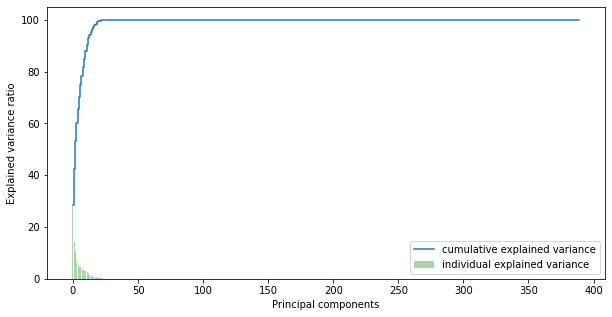

In [50]:
import matplotlib.pyplot as plt
def plot_explained_variance(X):
    #Calculating Eigenvecors and eigenvalues of Covariance matrix
    mean_vec = np.mean(X, axis=0)
    cov_mat = np.cov(X.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    # Create a list of (eigenvalue, eigenvector) tuples
    eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

    # Sort from high to low
    eig_pairs.sort(key = lambda x: x[0], reverse= True)

    # Calculation of Explained Variance from the eigenvalues
    tot = sum(eig_vals)
    var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
    cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
    plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')

plot_explained_variance(X_reconst)

Here we can see that the 99.99% of the variation is covered by 25 number of features:

In [51]:
pca = PCA(n_components=25)
PCA_X = pca.fit_transform(X_reconst)
pca.explained_variance_ratio_

array([0.28393643, 0.1406401 , 0.10623705, 0.07043066, 0.0545129 ,
       0.0470866 , 0.0447688 , 0.03690005, 0.03393513, 0.03152024,
       0.02932529, 0.0254492 , 0.02376973, 0.01517925, 0.01019768,
       0.00995351, 0.00885359, 0.00667157, 0.00646913, 0.00463217,
       0.00363425, 0.00249113, 0.0019057 , 0.00093939, 0.00054076])

In [52]:
sum(pca.explained_variance_ratio_)

0.9999803385421431

In [53]:
X_train, X_test, y_train, y_test = split(PCA_X, y)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     26587
           1       1.00      0.65      0.79      2260

    accuracy                           0.97     28847
   macro avg       0.99      0.83      0.89     28847
weighted avg       0.97      0.97      0.97     28847



Despite the fact that most of the variance is covered by 25 components, the performance of the model is exttremely reduced. Recal is reduced from 0.37 to 0.07.

#### 1.6.2 Linear Discriminant Analysis

In [54]:
LDA = LinearDiscriminantAnalysis()
LDA_X = LDA.fit_transform(X_reconst, y)
LDA_X


array([[-3.74915597],
       [-3.89715599],
       [-4.76636174],
       ...,
       [-3.54403609],
       [-3.54456363],
       [-3.75880542]])

In [55]:
X_train, X_test, y_train, y_test = split(LDA_X, y)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26587
           1       1.00      1.00      1.00      2260

    accuracy                           1.00     28847
   macro avg       1.00      1.00      1.00     28847
weighted avg       1.00      1.00      1.00     28847



The interesting result is that we reduce the dimension to 1 and the classification performance is increased from 0.37 to 0.43.
LDA is more effective on this data.